<a href="https://colab.research.google.com/github/RxnAch/DeepLearning/blob/main/TheImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U d2l

In [2]:
#Importing important Libraries
%matplotlib inline
import torch 
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
import matplotlib.pyplot as plt
d2l.use_svg_display()

In [13]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='/fashionmnist/fashion-mnist_train.csv',
                                                  train = True,transform = trans,download = True)
mnist_test = torchvision.datasets.FashionMNIST(root='/fashionmnist/fashion-mnist_test.csv',
                                                 train = False,transform = trans,download = True)
#We have 10 types of clothes in FashionMNIST dataset.
def get_fashion_mnist_labels(labels): 
  text_labels = ['t-shirt/Top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
  return text_labels[labels]


def load_data_fashion_mnist(batch_size,resize = None):
  trans = [transforms.ToTensor()] #Transfer image to tensors.
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans = transforms.Compose(trans)#Transforms are common image transformations.
  #They can be chained together using Compose(like a pipepline). 
  #Reading the dataset
  mnist_train = torchvision.datasets.FashionMNIST(root='/fashionmnist/fashion-mnist_train.csv',
                                                  train = True,transform = trans,download = True)
  mnist_test = torchvision.datasets.FashionMNIST(root='/fashionmnist/fashion-mnist_test.csv',
                                                 train = False,transform = trans,download = True)
  return (data.DataLoader(mnist_train,batch_size,shuffle = False,num_workers = 4),
          data.DataLoader(mnist_test,batch_size,shuffle= False,num_workers=4))
  train_iter,test_iter = load_data_fashion_mnist(32)

ankle boot


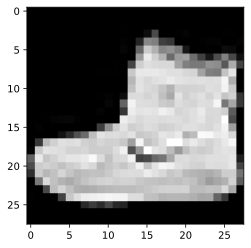

In [14]:
image,label = next(iter(mnist_train))
plt.imshow(image.squeeze(),cmap = "gray")
print(get_fashion_mnist_labels(label))